In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
raw_data = loadmat('ex6data1.mat')
data = pd.DataFrame(raw_data.get('X'),columns=['X1','X2'])
data['y'] = raw_data.get('y')
data.head()


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [3]:

def plot_init_data(data, fig, ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]
    
    ax.scatter(positive['X1'],positive['X2'],s=50,marker='x',label='Positive')
    ax.scatter(negative['X1'],negative['X2'],s=50,marker='o',label='Positive')


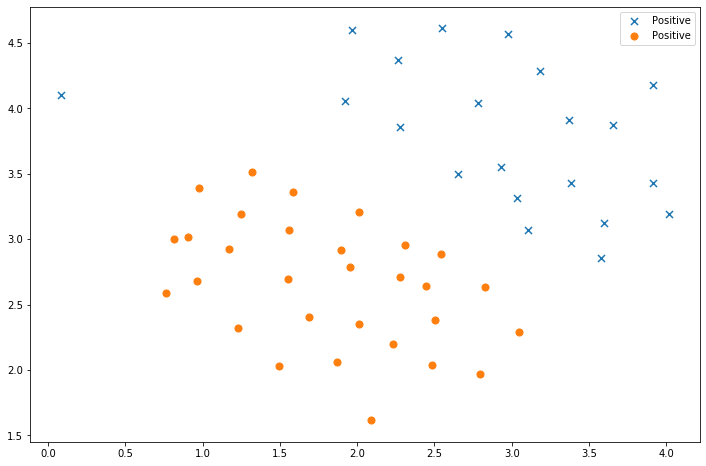

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data,fig,ax)
plt.legend()  # 右上角
plt.show()


z请注意，还有一个异常的正例在其他样本之外。  
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。

In [5]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge',max_iter=1000)
svc


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [6]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])


C:\Users\fsf15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

### 可视化分类边界

In [7]:
def find_decision_boundary(svc,x1min,x1max,x2min,x2max,diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)
    
    cordinates = [(x,y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    c_val['cval'] = svc.decision_function(c_val[['x1','x2']])
    decision = c_val[np.abs(c_val['cval']) < diff]
    return decision.x1, decision.x2


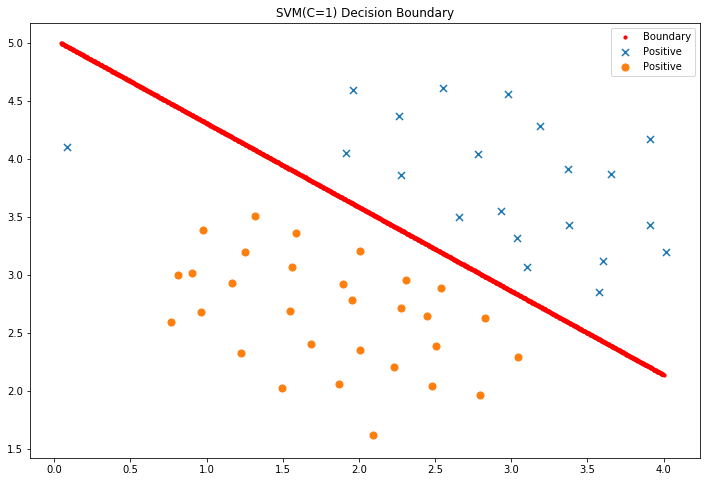

In [8]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2*10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r', label='Boundary')
plot_init_data(data,fig,ax)
ax.set_title('SVM(C=1) Decision Boundary')
ax.legend()
plt.show()


In [9]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])


C:\Users\fsf15\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

这次我们得到了训练数据的完美分类，但是通过增加C的值，我们创建了一个不再适合数据的决策边界。 我们可以通过查看每个类别预测的置信水平来看出这一点，这是该点与超平面距离的函数。

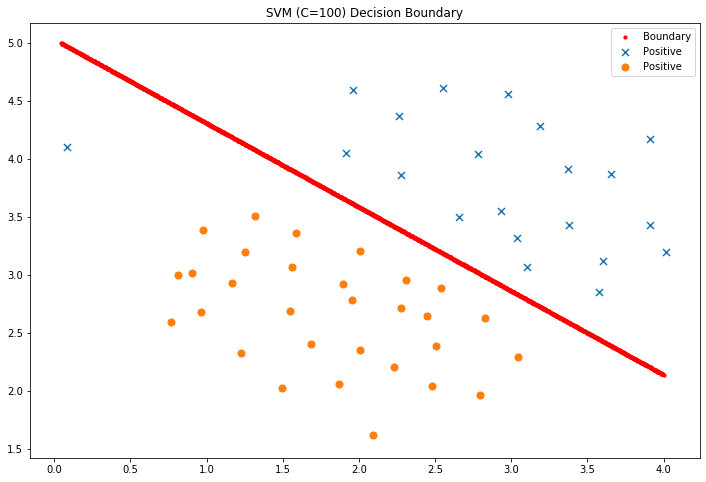

In [10]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=100) Decision Boundary')
ax.legend()
plt.show()


## 高斯内核的SVM
将线性SVM--> 能使用内核进行非线性分内的SVM，

In [11]:
#  高斯映射
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))


In [12]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2.0

gaussian_kernel(x1, x2, sigma)


0.32465246735834974

In [13]:
raw_data = loadmat('ex6data2.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']


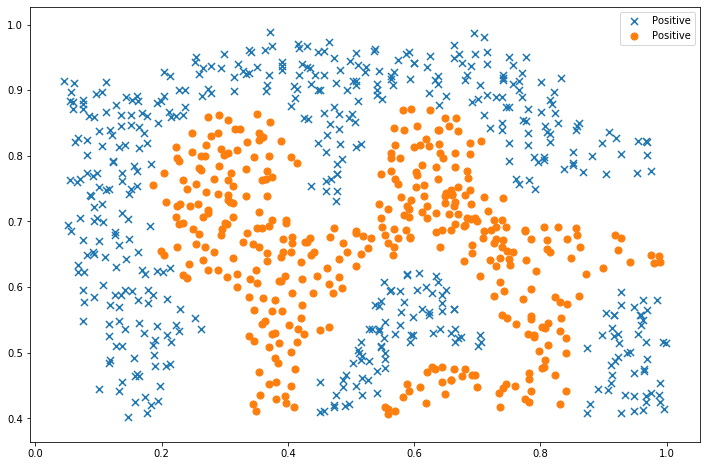

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.legend()
plt.show()


In [15]:
# 超参数  C，gamma(sigam)
svc = svm.SVC(C=100, gamma=10, probability=True)
svc
"""
rbf:高斯   
probability: 置信概率
"""

'\nrbf:高斯   \nprobability: 置信概率\n'

In [16]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])


0.9698725376593279

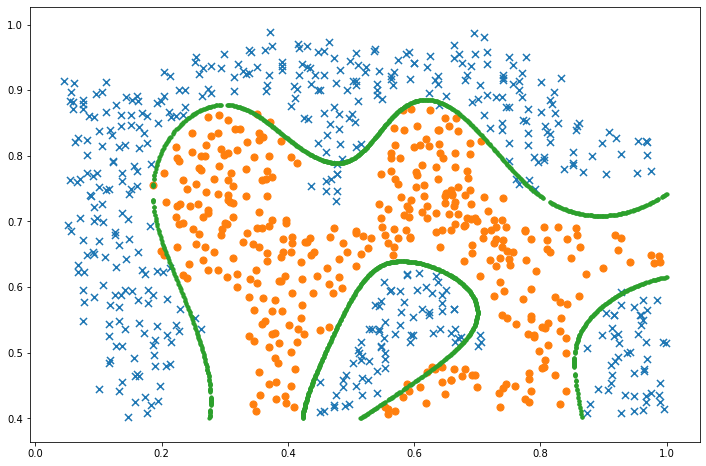

In [17]:
x1, x2 = find_decision_boundary(svc, 0, 1, 0.4, 1, 0.01)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()


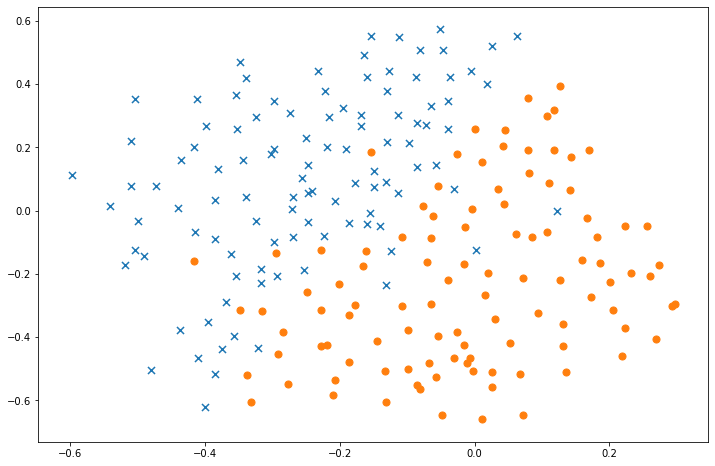

In [18]:
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

fig, ax = plt.subplots(figsize=(12,8))
data = pd.DataFrame(raw_data.get('X'), columns=['X1', 'X2'])
data['y'] = raw_data.get('y')
plot_init_data(data, fig, ax)
plt.show()


In [19]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]


In [20]:
best_score = 0
best_params = {'C': None, 'gamma': None}


In [21]:
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

In [22]:
svc = svm.SVC(C=best_params['C'], gamma=best_params['gamma'])
svc.fit(X, y)


SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

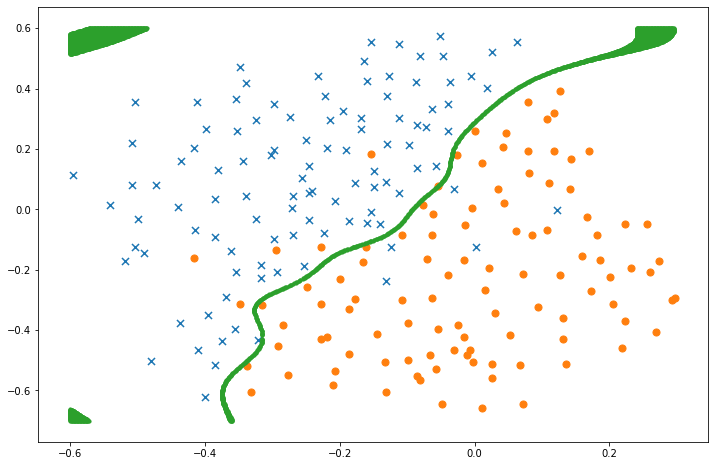

In [23]:
x1, x2 = find_decision_boundary(svc, -0.6, 0.3, -0.7, 0.6, 0.005)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()


# 垃圾邮件分类

用SVM来构建垃圾邮件过滤器

In [24]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')
spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [25]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape


((4000, 1899), (4000,), (1000, 1899), (1000,))

In [26]:
svc = svm.SVC()
svc.fit(X,y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Training accuracy = 99.32%
Test accuracy = 98.7%


In [28]:
kw = np.eye(1899)
kw[:3,:]
spam_val = pd.DataFrame({'idx':range(1899)})


In [29]:
spam_val['isspam'] = svc.decision_function(kw)


In [30]:
spam_val['isspam'].describe()

count    1899.000000
mean       -0.110039
std         0.049094
min        -0.428396
25%        -0.131213
50%        -0.111985
75%        -0.091973
max         0.396286
Name: isspam, dtype: float64

In [31]:
decision = spam_val[spam_val['isspam'] > -0.55]
decision

,idx,isspam
0,0,-0.093653
1,1,-0.083078
2,2,-0.109401
3,3,-0.119685
4,4,-0.165824
...,...,...
1894,1894,0.101613
1895,1895,-0.016065
1896,1896,-0.151573
1897,1897,-0.109022


In [32]:
path = 'vocab.txt'
voc = pd.read_csv(path,header=None, names=['idx', 'voc'],sep='\t')
voc.head()


,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [33]:
spamvoc = voc.loc[list(decision['idx'])]
spamvoc

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
...,...,...
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero
